In [1]:
import simplegrad as sg
import numpy as np

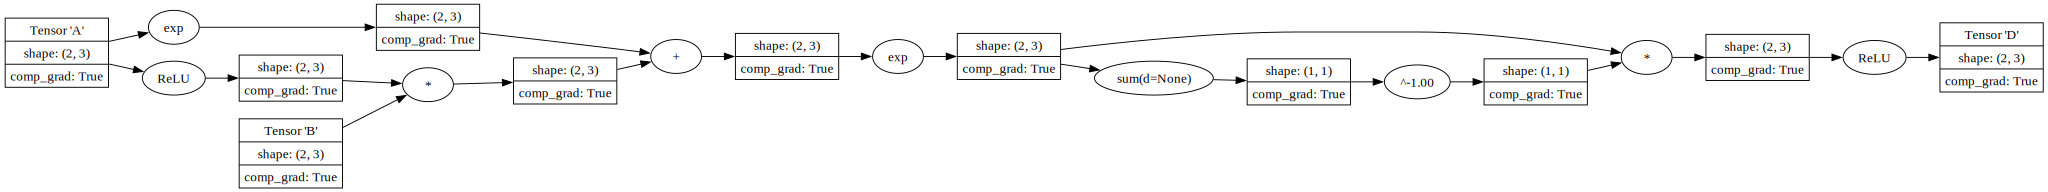

In [2]:
a = sg.Tensor([[1, 2, 0], [1, 1, 3]], label="A")
b = sg.Tensor([[1, 1, 0], [1, 1, 0]], label="B")
c = sg.exp(a) + sg.func.ReLU(a) * b
d = sg.func.ReLU(sg.func.Softmax(c)); d.label = "D"
d.display_graph(path="images/graph")

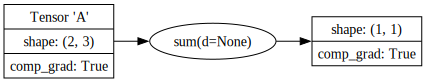

In [3]:
s = sg.sum(a, dim=None)
s.display_graph()

In [4]:
array1 = np.array([[32, 1, -23], [1, 0.1, -1.55], [-4.34, 1, 23]])
array2 = np.array([[3, 1, 0], [1, -33.1, -1.5], [8.78, 2, 23]])
a, b = sg.Tensor(array1), sg.Tensor(array2)
c = (2*((a+2)**3))/(3.33/(7.77-b))
c.zero_grad()
c.backward()
print(c.grad,'\n')
print(a.grad,'\n')
print(b.grad)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[ 9.93535122e+03  1.09783789e+02  6.17400042e+03]
 [ 1.09783789e+02  3.24750770e+02  3.38229821e+00]
 [-9.96460469e+00  9.35675697e+01 -1.71509027e+04]] 

[[-2.36060069e+04 -1.62162172e+01  5.56216278e+03]
 [-1.62162172e+01 -5.56216108e+00 -5.47297470e-02]
 [ 7.69543991e+00 -1.62162164e+01 -9.38438589e+03]]


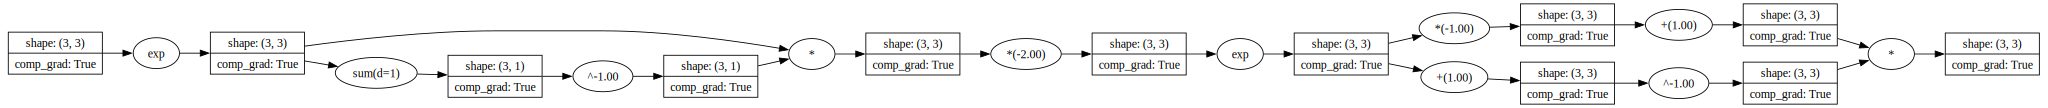

In [5]:
array1 = np.array([[9, -9.33, -2], [0, 0.1, -1.55], [-12, 0.77, 3.2]])
array2 = np.array([[-3.33, 1, 0], [1, -3.1, -1.5], [8.8, 2, -2.3]])
a, b = sg.Tensor(array1, dtype="float64"), sg.Tensor(array2, dtype="float64")
c = sg.func.Tanh(sg.func.Softmax(a, dim=1))
c.display_graph()


In [6]:
d = sg.exp(sg.sum(a, dim=0))
d.zero_grad()
d.backward()
a.grad

array([[-3.        , -8.46000004, -0.34999999],
       [-3.        , -8.46000004, -0.34999999],
       [-3.        , -8.46000004, -0.34999999]])